## Clustering
Slide: 4.2

Clustering is a types of unsurpervised learning in machine learning where the goal is to group similar data points together based on certain characteristics or features, without predifined labels or categories.

教師なし学習の一種で、事前定義されたラベルやカテゴリなしに、特定の特性や特徴に基づいて類似したデータポイントをグループ化することを目的としています

### K-Means Algorithm

K-means is one of the most popular and straightfoward unsurpevised machine learning algorithms used for clustering.

K-Meansは、クラスタリングに使用される最も人気があり、かつ分かりやすい教師なし機械学習アルゴリズムの1つ.


1.   Initialization:<br>
Randomly select K data points as ainitial centroids, representing the staring position for each cluster.<br>
初期化 : ランダムに $K$ 個のデータポイントを初期セントロイド（各クラスターの開始位置）として選択します


2.   Assignment Step:<br>
For each data point, calculate the distance to each centroid and assign it to the nearest cluster.<br>
割り当てステップ (Assignment Step): 各データポイントについて、各セントロイドまでの距離を計算し、最も近いクラスターに割り当てます

3.  Updata step:<br>
Recalculate the centroids by averaging the points of all data points in each cluster.<br>
更新ステップ (Update Step): 各クラスター内の全データポイントの平均を計算することで、セントロイドを再計算します

4.  Repeat:<br>
Continue the assignmet and update steps until centroids change insignificantly.<br>
繰り返し (Repeat): セントロイドがほとんど変化しなくなるまで、割り当てと更新のステップを繰り返します

### WCSS
The goal of K-Mean is to minimize the within-cluster sum of square (WCSS), also known as interia.<br>

K-Meansの目的関数(WCSS)K-Meansの目的は、クラスター内平方和 (Within-Cluster Sum of Squares: WCSS)、別名**慣性 (inertia)**を最小化することです .<br>

数式:<br>

$$WCSS=\sum_{i=1}^{K}\sum_{x\in C_{i}}||x-\mu_{i}||^{2}$$

<br>
数式の解説:<br>
<br>$WCSS$: クラスター内平方和 (最小化すべき目的関数).<br>
$K$: クラスターの数.<br>
$x$: データセット内のデータポイント.<br>
$C_{i}$: クラスター $i$ に含まれる点の集合<br>
$\mu_{i}$: クラスター $i$ のセントロイド（中心点）<br>
$||x-\mu_{i}||^{2}$: データポイント $x$ とセントロイド $\mu_{i}$ の間の二乗ユークリッド距離.<br><br>


この式は、「データポイントとその属するクラスターの中心との距離(類似度)の二乗の合計」を表しており、これが小さいほど、データポイントがクラスターの中心に密接に集まっている(すなわち、クラスタリングの品質が高い)ことを意味します。
<br>
<br>
Applicants of K-Means (K-Meansの応用例)<br>
1. Cluster Segmentation:<br>
Grouping customers with similar purchasing behaviors or characteristics for targeted marketing.<br>
顧客セグメンテーション: 類似した購買行動や特性を持つ顧客をグループ化し、ターゲットを絞ったマーケティングを行う.<br><br>

2. Image Compression:<br>By clustering tge colar space of an image, K-Means can reduce the number of unique colars, effectively compressing the image.<br>
画像圧縮: 画像の色空間をクラスタリングすることで、固有の色の数を減らし、効果的に画像を圧縮する.<br><br>

異常検知: 正常なデータポイントをクラスタリングすることで、外れ値や異常を特定するのに役立つ


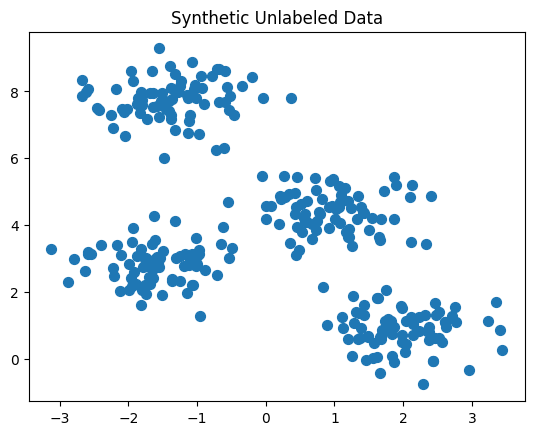

In [4]:
import numpy as np                           # calculator
import matplotlib.pyplot as plt              # to draw chart
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the synthetic unlabeled data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Unlabeled Data")
plt.show()

### matplotlib.pyplot
Python の Matplotlib ライブラリの一部であり、グラフやプロットを作成するための関数やインターフェースを提供します。インタラクティブなプロットや簡単な可視化タスクによく使用されます<br>

**plt.scatter(X[:, 0], X[:, 1], s=50)**

これは、matplotlib.pyplot ライブラリ（plt としてインポートされています）を使用して散布図を作成するコードです。<br>
<br>
**plt.scatter():** 散布図を作成するための関数です。<br>

**X[:, 0]:** データの最初の列（通常は X 軸の値を表します）を指定しています。X はデータポイントの配列で、[:, 0] はすべての行の 0 列目を選択しています。<br>

**X[:, 1]:** データの 2 番目の列（通常は Y 軸の値を表します）を指定しています。[:, 1] はすべての行の 1 列目を選択しています。<br>

**s=50: **プロットされる各点のサイズを 50 に設定しています。<br>

つまり、このコードは、生成されたデータセット X の最初の列を x 座標、2 番目の列を y 座標として、サイズ 50 の点で散布図を描画しています。これは、クラスタリングを行う前の生のデータポイントの分布を視覚化するために使用されます。


### sklearnとは?
scikit-learn (sklearn)は、Python で書かれたオープンソースの機械学習ライブラリです。シンプルで効率的なツールを提供しており、データの分類、回帰、クラスタリング、次元削減、モデル選択、前処理など、様々な機械学習タスクに使用できます。

提供されているデータセット、アルゴリズム、評価指標などが充実しており、機械学習の学習から実践まで幅広く活用されています。

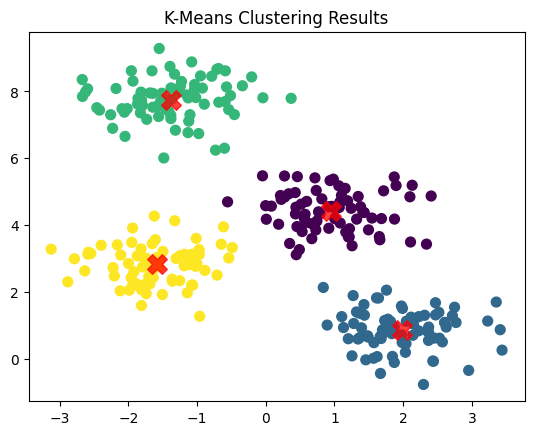

In [5]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("K-Means Clustering Results")
plt.show()

In [6]:
# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6819938690643478


### Silhouette Score シルエットスコア
<br>

 - A measure of how similar a data point is to its own cluster(cohesion) compared to other clusters (separation) <br>
 データポイントが**自身のクラスターにどれだけ似ているか（凝集度: cohesion）**を、他のクラスターと比較して（分離度: separation）測定する尺度です<br>
 - Calculate the silhouette score for K-Means clustering and use it to determine the optimal number of clusters <br>
 K-Meansクラスタリングの最適なクラスター数を決定するために使用されます<br><br>

 数式:$$S(i)=\frac{b(i)-a(i)}{max(a(i),b(i))}$$
<br>
数式の解説:<br><br>

$S(i)$: サンプル $i$ のシルエットスコア（値は $-1$ から $1$ の間）<br><br>

$a(i)$: **The mean intra-cluster distance,** or the average distance between the data point $i$ and all other points in the same cluster <br>
平均クラスター内距離<br>
データポイント $i$ と同じクラスター内の他のすべての点との平均距離 1<br>
これは、自身のクラスターへの凝集度を示します<br><br>

$b(i)$:  The mean nearest-cluster distance for point $i$ , or the average distance between the point and points in the nearest(different) cluster.<br>
平均最近隣クラスター距離<br>
点 $i$ と最も近い（異なる）クラスター内の点との平均距離<br>
これは、他のクラスターからの分離度を示します。<br><br>

$\text{max}(a(i), b(i))$:<br>
分母は $a(i)$ と $b(i)$ のうち大きい方で、スコアが常に $[-1, 1]$ の範囲に収まるように正規化します。<br><br>

スコアの意味:<br>
$S(i) \approx 1$: データポイントは自身のクラスターによく適合しており、他のクラスターから明確に分離されている（良いクラスタリング） <br><br>

$S(i) \approx 0$: データポイントはクラスターの境界に非常に近く、どのクラスターに属するか曖昧である<br><br>

$S(i) \approx -1$: データポイントは間違ったクラスターに割り当てられている可能性がある（悪いクラスタリング）。

For n_clusters = 2, the average silhouette score is : 0.595521
For n_clusters = 3, the average silhouette score is : 0.761348
For n_clusters = 4, the average silhouette score is : 0.791104
For n_clusters = 5, the average silhouette score is : 0.663349
For n_clusters = 6, the average silhouette score is : 0.535775
For n_clusters = 7, the average silhouette score is : 0.441587
For n_clusters = 8, the average silhouette score is : 0.343484
For n_clusters = 9, the average silhouette score is : 0.350213
For n_clusters = 10, the average silhouette score is : 0.358625


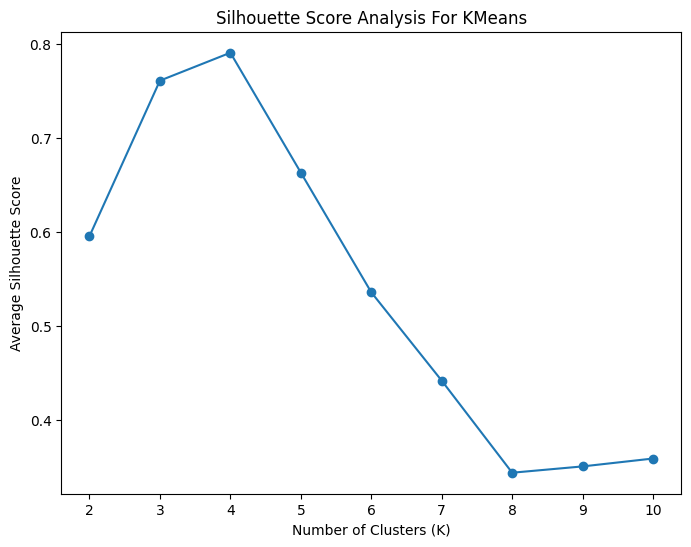

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate synthetic unlabeded data
X, _ = make_blobs(n_samples = 500, n_features=2, centers=4, cluster_std=1, random_state=42)


# Range of possible K values to try
range_n_clusters = list(range(2, 11)) # 10 is not included to this list since this is a "list"

# List to store the average silhouette scores
silhouette_avg_scores = []

# Loop through different K values
for n_clusters in range_n_clusters:
  # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init = 10)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the average silhouette score for each K
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg:4f}")

# Plot the silhoette scores to see the optimal K

plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker = 'o')
plt.title("Silhouette Score Analysis For KMeans")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.show()

手法 (Method) <br>
強み (Strengths) <br>
弱み (Weaknesses) <br>  <br>

K-Means <br>
高速、シンプル、スケーラブル 22事前に $K$ が必要、不規則な形状に弱い  <br>  <br>

階層的 (Hierarchical) <br>
$K$ が不要、デンドログラムで可視化可能 大規模データセットにはスケーラブルではない、ノイズに敏感  <br>  <br>
 DBSCAN <br>
 任意の形状のクラスターを見つける、ノイズを処理できる  <br>
 密度が異なるデータや高次元データに弱い  <br>  <br>

 GMM <br>
 柔軟なクラスター、確率的な割り当て  <br>
 $K$ が必要、計算コストが高い  <br>  <br>

 Mean-Shift <br>
 $K$ が不要、クラスターを自動的に見つける  <br>
 計算コストが高い、スケーラビリティが低い  <br>

 Spectral Clustering <br>  <br>
 複雑な構造や非凸形状に適している  <br>
 計算負荷が高い  <br>  <br>

 Agglomerative <br>
 柔軟性がある、$K$ が不要  <br>
 低速、ノイズに敏感  <br> <br>

OPTICS	 <br>
密度のばらつきに対応、外れ値に適している  <br>
大規模データセットでは低速  <br> <br>

BIRCH	 <br>
大規模データセットにスケーラブル  <br>
球状のクラスターに最適に機能する <br>

## サポートベクターマシン (Support Vector Machine: SVM) <br>

概念サポートベクターマシン (SVM) は、主に分類タスクと回帰タスクに使用される、強力で汎用性の高い教師あり機械学習アルゴリズムです  <br>
SVMは、データセットを2つのクラスに最もよく分割する超平面を見つけるという概念に基づいています  <br>
目標は、各クラスの最も近い点と超平面との間のマージンを最大化することです  <br>
この最も近い点がサポートベクターと呼ばれ、超平面を支持（定義）します  <br>  <br>

超平面の定義式 <br>
数式:$$w^{T}x+b=0$$ <br>
数式の解説: <br>  
$w$: 重みベクトル (Weight vector)。超平面に垂直なベクトルで、超平面の向きを定義します  <br>  
$x$: データポイントの入力ベクトル。 <br>
$b$: バイアスまたはしきい値 (bias/threshold)。超平面が原点からどれだけ離れているかを決定します  <br>
$w^{T}x$: ベクトル $w$ と $x$ の内積を表します。この式は、分離超平面 (separating hyperplane) を定義します。 <br>
データポイント $x$ をこの式に代入した結果の符号によって、その点がどちらのクラスに属するかを決定します。

### 最適化問題（ソフトマージンSVM）


SVMの訓練は、最適な $w$ と $b$ を見つけるための二次計画法 (Quadratic Programming: QP) の最適化問題に帰着します <br>
線形分離不可能な場合や外れ値を許容する場合（ソフトマージンSVM）の目的関数と制約条件は以下のようになります。 <br>  <br>

目的関数: <br>
$$\min_{w, b, \xi} \frac{1}{2} ||w||^{2} + C \sum_{i=1}^{n} \xi_{i}$$ <br>
制約条件: <br>

$$y_{i}(w^{T}x_{i}+b) \geq 1 - \xi_{i} \quad \text{for all } i$$ <br>
数式の解説:<br>

$\min_{w, b, \xi}$: $w$（重みベクトル）、$b$（バイアス）、$\xi$（スラック変数）に関して最小化します。 <br>

$\frac{1}{2} ||w||^{2}$: マージンの逆数の二乗です。この項を最小化することは、マージンを最大化することと同義です。 <br>  <br>


$C \sum_{i=1}^{n} \xi_{i}$: ペナルティ項です。 <br>

$C$: 正則化パラメータ（ハイパーパラメータ）。マージン最大化と誤分類のペナルティとのトレードオフを制御します。 <br>
$C$ が大きいほど誤分類を厳しく罰します。 <br>
$\xi_{i}$ (スラック変数):  データポイント $x_i$ がマージン内に存在したり、誤分類されたりする程度を表します。 $\xi_i > 0$ は誤分類やマージン違反を示します。 <br>  <br>

 $y_{i}(w^{T}x_{i}+b) \geq 1 - \xi_{i}$: 制約条件。 <br>
 $y_{i}$: クラスラベル（$\pm 1$）。 <br>
 この制約は、すべての訓練データポイントが、スラック $\xi_{i}$ を許容しつつ、分離超平面からマージン $\pm 1$ の外側に位置するように要求します。

### カーネル関数 (Kernels in SVM)


線形SVMではカーネルはドット積ですが、非線形SVMでは、RBFや多項式カーネルなどのカーネル関数を使用して、データをより高次元の空間にマッピングします 47。

カーネル (Kernel)
数式 (Equation)
ユースケース (Use Case)
柔軟性 (Flexibility)


線形 (Linear)$K(x_{i}, x_{j}) = x_{i}^{T}x_{j}$線形分離可能なデータ低 (Low)


多項式 (Polynomial)$K(x_{i}, x_{j}) = (x_{i}^{T}x_{j} + c)^{d}$
多項式の関係性中程度～高 (Moderate to High)


RBF (Radial Basis Function)
$K(x_{i}, x_{j}) = \exp(-\gammax_{i} - x_{j}


Sigmoid$K(x_{i}, x_{j}) = \tanh(\alpha x_{i}^{T}x_{j} + c)$
シグモイド型の関係性中程度 (Moderate)

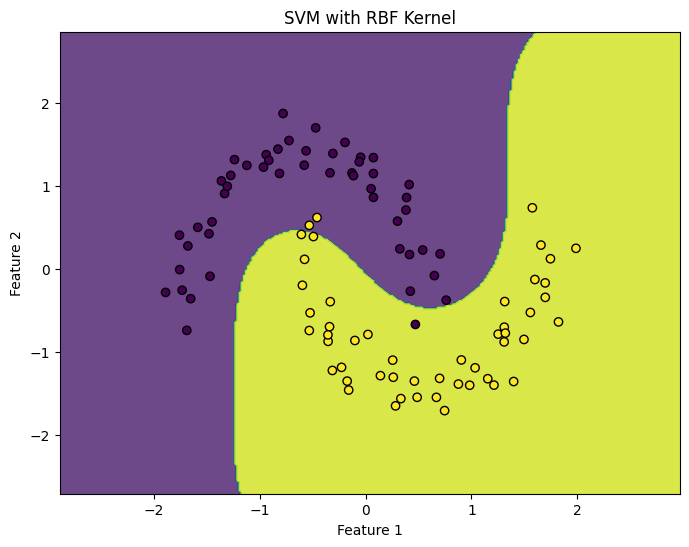

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler



# Generate a moon-shaped dataset (non-linear data)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Standardize/Scale the data (Important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')


# Apply SVM with RBF kernel
rbf_svm = svm.SVC(kernel='rbf', gamma=0.5, C=1.0)
rbf_svm.fit(X_scaled, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(rbf_svm, X_scaled, y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel')
plt.show()

### 決定木 (Decision Tree)



概念決定木 (Decision Tree) は、分類タスクと回帰タスクの両方に使用される一般的な機械学習モデルです 48。特徴量値に基づいてデータを再帰的に分割し、同質なサブセットを作成することを目標とします 49。決定木の主要な概念:ルートノード (Root Node): 最初の分割が行われる、木の最初のノード 50。内部ノード (Internal Nodes): 特徴量値に基づいてデータが分割されるノード 51。リーフノード (Leaf Nodes): 最終的な分類または予測値を提供する終端ノード 52。分割基準 (Splitting Criteria):分類 (Classification) の場合:ジニ不純度 (Gini Impurity): 誤分類の可能性を測定します 53。エントロピー (Entropy) / 情報利得 (Information Gain): データのランダム性を測定します 54。目標は、各分割で情報利得を最大化する（エントロピーを減少させる）ことです 55。回帰 (Regression) の場合:平均二乗誤差 (Mean Squared Error: MSE): 連続するターゲット変数（目的変数）の分散を測定し、それを最小化することを目的とします 56。分割基準の数式エントロピー (Entropy):$$\text{Entropy} = -\sum_{i=1}^{n} p_{i} \log_{2}(p_{i})$$数式の解説:$p_{i}$: ノード内のデータがクラス $i$ に属する確率。$\sum_{i=1}^{n}$: すべてのクラスにわたる合計。エントロピーは不確実性またはランダム性の尺度です。値が大きいほどランダム性が高く、小さいほどデータが単一のクラスに集中しています。ジニ不純度 (Gini Impurity):$$\text{Gini Impurity} = 1 - \sum_{i=1}^{n} p_{i}^{2}$$数式の解説:$p_{i}$: ノード内のデータがクラス $i$ に属する確率。ジニ不純度は、ノードからランダムに選択された要素が誤って分類される確率を測定します。$0$（純粋、すべての要素が同じクラス）から $1$ に近い値（最大不純度、均等に分布）をとります。平均二乗誤差 (Mean Squared Error: MSE) - 回帰の場合:$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y})^{2}$$数式の解説:$N$: ノード内のサンプル数。$y_{i}$: サンプル $i$ の実際のターゲット値。$\hat{y}$: ノードにおける予測値（通常はターゲット値の平均）。MSEは、実際の値と予測値の差の二乗の平均です。分割の目的は、このMSEを最小化することです。 <br>  <br>

### 決定木の仕組み <br>
ルートから開始: すべての訓練データをルートノードから開始します 57。 <br>

最適な特徴量の選択: 各ノードで、ジニ不純度や情報利得（分類の場合）または平均二乗誤差（回帰の場合）などの基準に基づいて、最適な分割をもたらす特徴量を選択します  <br>

データの分割: 選択された特徴量としきい値に基づいて、データをサブセットに分割します <br>  <br>

再帰的な繰り返し: 各サブセットに対してプロセスを繰り返し、新しい内部ノードとリーフを作成します  <br>

停止基準: 最大深さ、ノード内の最小サンプル数、またはさらなる分割で精度が向上しないなどの停止基準が満たされるまで再帰を続行します 61。

Accuracy of Decision Tree Classifier: 1.00


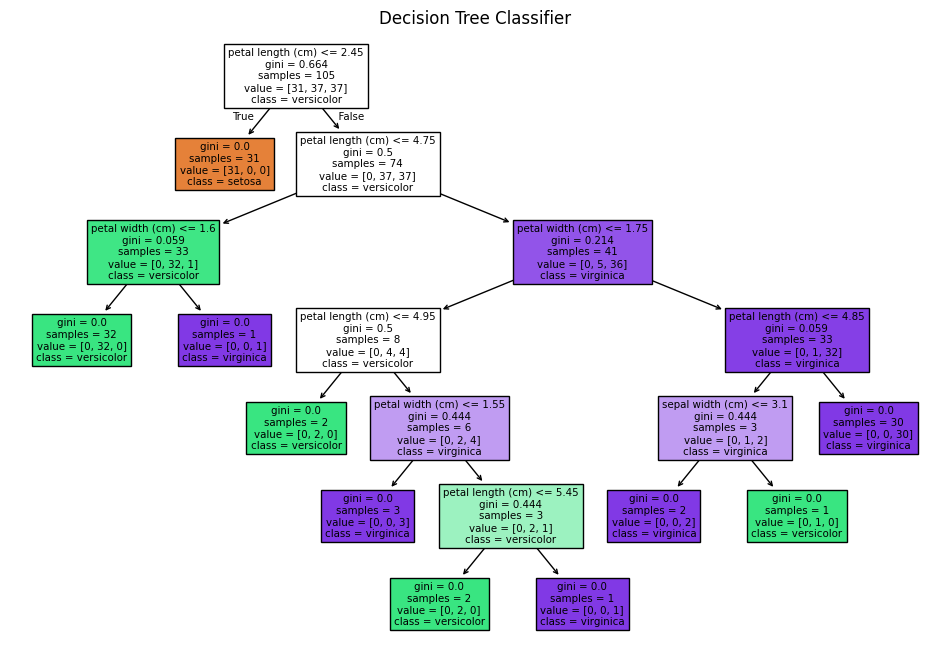

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
# You can experiment with hyperparameters like criterion, max_depth, min_samples_split, etc.
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

# Visualize the Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

### ランダムフォレスト (Random Forest)
概念

ランダムフォレストは、分類タスクと回帰タスクの両方に使用される、強力で汎用性の高いアンサンブル学習アルゴリズムです 。

ランダムフォレストは複数の決定木のアンサンブル（組み合わせ）です 。森の各木は、訓練データの異なるサブセットと、特徴量のランダムなサブセットを使用して構築されます 。


複数の決定木の予測を組み合わせることで、より正確でロバストな結果を生み出します 。このランダム性が、個々の決定木で発生する可能性がある過学習 (overfitting) のリスクを軽減します 。<br><br>



### ランダムフォレストの手順

ブートストラップサンプリング (Bootstrap Sampling): 訓練データのランダムなサブセット（置換あり）が、各木を構築するために使用されます 。この手法はブートストラップ集約 (Bootstrap Aggregating)、またはバギング (bagging) と呼ばれます 。


ランダムな特徴量選択 (Random Feature Selection): 木のノード分割ごとに、特徴量のランダムなサブセットが選択され、そのサブセットから最良の特徴量が分割のために選択されます 。これにより、ランダム性が加わり、木同士の相関が減少します 。


決定木の構築: 各決定木は、独自のブートストラップサンプルとランダムな特徴量のサブセットを使用して独立して構築されます 。

予測 (Prediction):


分類の場合: すべての木の予測が多数決 (majority voting) によって結合されます（最も多くの票を獲得したクラスが最終予測となります） 。


回帰の場合: すべての木の予測が平均化され、最終予測が生成されます 。

In [ ]:
# Import necessary Libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.moldel_selection import train_test_split
from sklearn.metrics import accuracy_score1